In [2]:
#say no to warnings!
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [3]:
import tensorflow as tf
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.backend import clear_session
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer,Dense

In [5]:
bc = datasets.load_breast_cancer()
x = bc.data
y = bc.target

In [6]:
x.shape

(569, 30)

In [7]:
np.unique(y,return_counts=True)

(array([0, 1]), array([212, 357]))

In [9]:
xtrain, xtest, ytrain, ytest = \
    train_test_split(x, y, test_size = 0.25, stratify=y)

In [10]:
def plot_learning_curves(hist,exp_name):
    plt.figure(figsize=(10,4))
    for subplot,curve in enumerate(['loss','accuracy']):
        plt.subplot(1,2,subplot+1)
        plt.plot(hist.history[curve],label='training')
        plt.plot(hist.history['val_'+curve],label='validation')
        plt.legend()
        plt.title(exp_name+':'+curve)
    plt.tight_layout();

In [11]:
def get_model():
    model = Sequential()
    model.add(Dense(units=30, activation='relu', input_dim=30))
    model.add(Dense(units=30, activation='relu'))
    model.add(Dense(units=30, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [12]:
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 2,821
Trainable params: 2,821
Non-trainable params: 0
_________________________________________________________________


In [13]:
%%time
history = model.fit(xtrain, ytrain, epochs=5,
            validation_data=(xtest, ytest), verbose=0)

CPU times: user 1.33 s, sys: 198 ms, total: 1.52 s
Wall time: 1.17 s


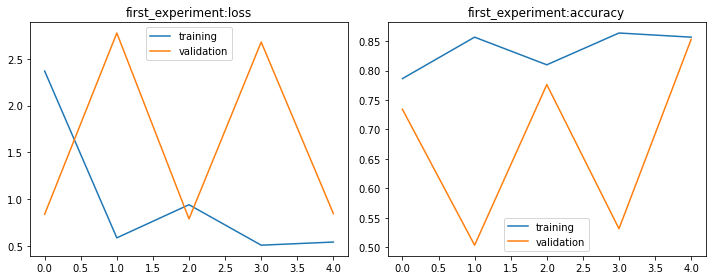

In [14]:
plot_learning_curves(history,'first_experiment')